# EDA ON RETAIL SALES AND CUSTOMER BEHAVIOUR ANALYSIS

1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


2. Load the Dataset

In [8]:
df=pd.read_csv(r"C:\DataScience\Project\retail_data.csv")


3. Cleaning the Dataset

In [9]:
# To check for the dimensionality of the DataFrame i.e. to view the number of rows and columns contained in the dataset
df.shape

(1000000, 78)

4. Sample preparation


In [10]:
df=df.sample(120000)

5. Basic information about the Dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120000 entries, 796074 to 997196
Data columns (total 78 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   customer_id                120000 non-null  int64  
 1   age                        120000 non-null  int64  
 2   gender                     120000 non-null  object 
 3   income_bracket             120000 non-null  object 
 4   loyalty_program            120000 non-null  object 
 5   membership_years           120000 non-null  int64  
 6   churned                    120000 non-null  object 
 7   marital_status             120000 non-null  object 
 8   number_of_children         120000 non-null  int64  
 9   education_level            120000 non-null  object 
 10  occupation                 120000 non-null  object 
 11  transaction_id             120000 non-null  int64  
 12  transaction_date           120000 non-null  object 
 13  product_id                 12

In [12]:
print(df.head(10).to_string())

        customer_id  age gender income_bracket loyalty_program  membership_years churned marital_status  number_of_children education_level     occupation  transaction_id     transaction_date  product_id product_category  quantity  unit_price  discount_applied  payment_method store_location  transaction_hour day_of_week  week_of_year  month_of_year  avg_purchase_value purchase_frequency   last_purchase_date  avg_discount_used preferred_store  online_purchases  in_store_purchases  avg_items_per_transaction  avg_transaction_value  total_returned_items  total_returned_value  total_sales  total_transactions  total_items_purchased  total_discounts_received  avg_spent_per_category  max_single_purchase_value  min_single_purchase_value product_name product_brand  product_rating  product_review_count  product_stock  product_return_rate product_size  product_weight product_color product_material product_manufacture_date  product_expiry_date  product_shelf_life  promotion_id        promotion_type

In [13]:
# Renaming the columns
for i in df:
    # print(i)
    j=i.capitalize()
    # print(j)
    df=df.rename(columns={i:j})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120000 entries, 796074 to 997196
Data columns (total 78 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Customer_id                120000 non-null  int64  
 1   Age                        120000 non-null  int64  
 2   Gender                     120000 non-null  object 
 3   Income_bracket             120000 non-null  object 
 4   Loyalty_program            120000 non-null  object 
 5   Membership_years           120000 non-null  int64  
 6   Churned                    120000 non-null  object 
 7   Marital_status             120000 non-null  object 
 8   Number_of_children         120000 non-null  int64  
 9   Education_level            120000 non-null  object 
 10  Occupation                 120000 non-null  object 
 11  Transaction_id             120000 non-null  int64  
 12  Transaction_date           120000 non-null  object 
 13  Product_id                 12

In [14]:
# Checking for any duplicate rows
df.duplicated().sum()

np.int64(0)

In [15]:
# Checking for any null values present
df.isnull().sum().sum()

np.int64(0)

<i> No null values are present in the dataset

In [16]:
# Dropping unwanted columns
columns_to_drop=['Customer_id','Marital_status','Education_level','Product_id','Transaction_id','Transaction_hour','Product_weight','Customer_zip_code','Store_zip_code','Promotion_id']
df=df.drop(columns=columns_to_drop)
print(df.columns.tolist())

['Age', 'Gender', 'Income_bracket', 'Loyalty_program', 'Membership_years', 'Churned', 'Number_of_children', 'Occupation', 'Transaction_date', 'Product_category', 'Quantity', 'Unit_price', 'Discount_applied', 'Payment_method', 'Store_location', 'Day_of_week', 'Week_of_year', 'Month_of_year', 'Avg_purchase_value', 'Purchase_frequency', 'Last_purchase_date', 'Avg_discount_used', 'Preferred_store', 'Online_purchases', 'In_store_purchases', 'Avg_items_per_transaction', 'Avg_transaction_value', 'Total_returned_items', 'Total_returned_value', 'Total_sales', 'Total_transactions', 'Total_items_purchased', 'Total_discounts_received', 'Avg_spent_per_category', 'Max_single_purchase_value', 'Min_single_purchase_value', 'Product_name', 'Product_brand', 'Product_rating', 'Product_review_count', 'Product_stock', 'Product_return_rate', 'Product_size', 'Product_color', 'Product_material', 'Product_manufacture_date', 'Product_expiry_date', 'Product_shelf_life', 'Promotion_type', 'Promotion_start_date', '

In [17]:
# Renaming few columns
df=df.rename(columns={'Day_of_week':'Days','Week_of_year':'Weeks','Month_of_year':'Months'})
print(df.columns.tolist())

['Age', 'Gender', 'Income_bracket', 'Loyalty_program', 'Membership_years', 'Churned', 'Number_of_children', 'Occupation', 'Transaction_date', 'Product_category', 'Quantity', 'Unit_price', 'Discount_applied', 'Payment_method', 'Store_location', 'Days', 'Weeks', 'Months', 'Avg_purchase_value', 'Purchase_frequency', 'Last_purchase_date', 'Avg_discount_used', 'Preferred_store', 'Online_purchases', 'In_store_purchases', 'Avg_items_per_transaction', 'Avg_transaction_value', 'Total_returned_items', 'Total_returned_value', 'Total_sales', 'Total_transactions', 'Total_items_purchased', 'Total_discounts_received', 'Avg_spent_per_category', 'Max_single_purchase_value', 'Min_single_purchase_value', 'Product_name', 'Product_brand', 'Product_rating', 'Product_review_count', 'Product_stock', 'Product_return_rate', 'Product_size', 'Product_color', 'Product_material', 'Product_manufacture_date', 'Product_expiry_date', 'Product_shelf_life', 'Promotion_type', 'Promotion_start_date', 'Promotion_end_date', 

In [18]:
# Keeping a copy of the cleaned DataFrame
df_backup=df.copy()

In [19]:
df.to_csv('Cleaned_Project_Data.csv')

In [20]:
#  Understanding the statistical distribution of the data
df.describe()

,Age,Membership_years,Number_of_children,Quantity,Unit_price,Discount_applied,Weeks,Months,Avg_purchase_value,Avg_discount_used,...,Min_single_purchase_value,Product_rating,Product_review_count,Product_stock,Product_return_rate,Product_shelf_life,Distance_to_store,Customer_support_calls,Website_visits,Days_since_last_purchase
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,...,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,48.502692,4.496442,2.008433,5.012967,501.404590,0.250005,26.576192,6.499708,254.726452,0.250893,...,5.035745,3.000177,499.990350,49.486625,0.250559,182.095667,49.974658,9.475058,49.463383,182.452242
std,17.876448,2.876176,1.413900,2.589888,288.308865,0.144559,15.003078,3.456904,141.486209,0.144426,...,2.857433,1.155826,288.777415,28.892793,0.144381,105.060602,28.828819,5.762225,28.843855,105.506805
min,18.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,10.010000,0.000000,...,0.100000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,2.000000,1.000000,3.000000,251.767500,0.120000,14.000000,3.000000,131.700000,0.130000,...,2.550000,2.000000,250.000000,24.000000,0.130000,92.000000,24.980000,4.000000,24.000000,91.000000
50%,49.000000,5.000000,2.000000,5.000000,502.020000,0.250000,27.000000,7.000000,254.600000,0.250000,...,5.030000,3.000000,499.000000,49.000000,0.250000,182.000000,49.950000,9.000000,49.000000,183.000000
75%,64.000000,7.000000,3.000000,7.000000,751.187500,0.380000,40.000000,9.000000,376.812500,0.380000,...,7.510000,4.000000,751.000000,75.000000,0.380000,273.000000,74.850000,14.000000,74.000000,274.000000
max,79.000000,9.000000,4.000000,9.000000,999.980000,0.500000,52.000000,12.000000,500.000000,0.500000,...,10.000000,5.000000,999.000000,99.000000,0.500000,364.000000,100.000000,19.000000,99.000000,364.000000


##  Data Analysis and Visualisation

1. Demographic Analysis of Customers

In [21]:
# Fetching customer details
cust_detail=df[['Age','Gender','Income_bracket','Loyalty_program','Membership_years','Churned','Number_of_children','Occupation']]
cust_detail.sort_values(by='Age',ascending=False).reset_index().drop(columns='index')

,Age,Gender,Income_bracket,Loyalty_program,Membership_years,Churned,Number_of_children,Occupation
0,79,Female,Medium,No,4,No,1,Self-Employed
1,79,Female,Medium,No,8,No,3,Self-Employed
2,79,Male,Low,No,4,No,3,Unemployed
3,79,Male,Medium,Yes,7,No,4,Employed
4,79,Female,High,Yes,2,No,1,Employed
...,...,...,...,...,...,...,...,...
119995,18,Other,High,Yes,1,Yes,4,Retired
119996,18,Female,Low,Yes,2,Yes,2,Retired
119997,18,Female,Medium,Yes,2,Yes,4,Retired
119998,18,Other,Low,No,1,No,1,Employed


1.1 What is the age range and gender distribution of the customers?

Age Range:  18 - 79


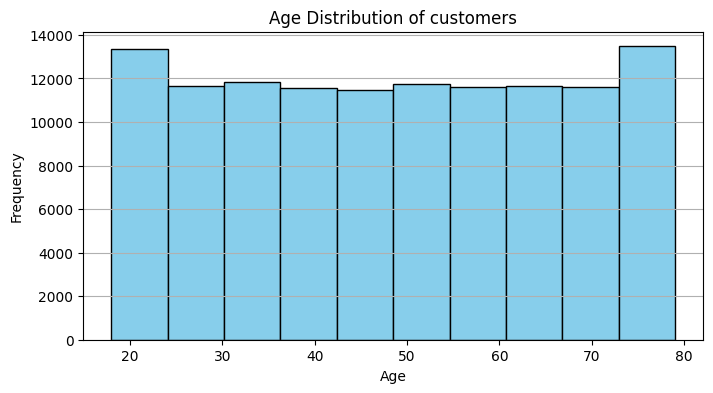

In [22]:
age_min = cust_detail['Age'].min() 
age_max = cust_detail['Age'].max()
print(f"Age Range: ",age_min,'-',age_max)


# Plotting bar graph for the age distribution
plt.figure(figsize=(8, 4))
plt.hist(cust_detail['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution of customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()



Gender
Female    40161
Male      39938
Other     39901
Name: count, dtype: int64


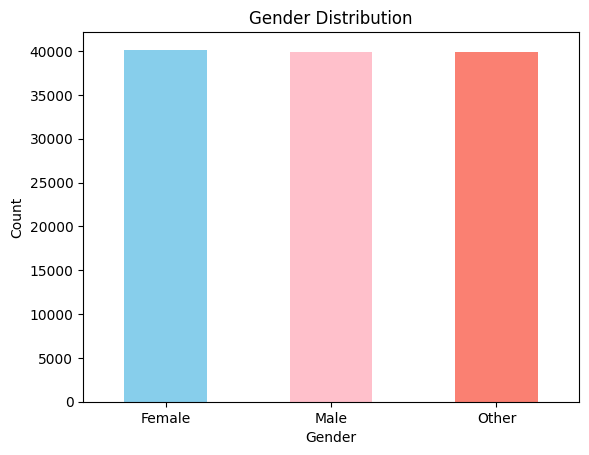

In [23]:
gender_counts = cust_detail['Gender'].value_counts()
print(gender_counts)


# Plotting for Gender Distribution
gender_counts.plot(kind='bar', color=['skyblue', 'pink','salmon'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

1.2 What is the total number of members churned?

Churned
No     59994
Yes    60006
Name: Churned, dtype: int64


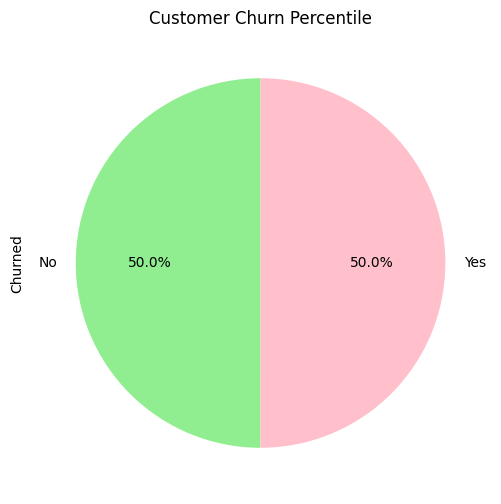

In [25]:
# Groupby churned and counting the number of churns
Total_churns=cust_detail.groupby('Churned')['Churned'].count()
print(Total_churns)

# Plotting as a pie chart
plt.figure(figsize=(8, 6))
Total_churns.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightgreen','pink'])
plt.title('Customer Churn Percentile')
plt.show()

1.3 What is the total number of children our customers have based on gender?

Gender
Female    80342
Male      80711
Other     79959
Name: Number_of_children, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_15020\4212336184.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Total_children, palette='pastel')


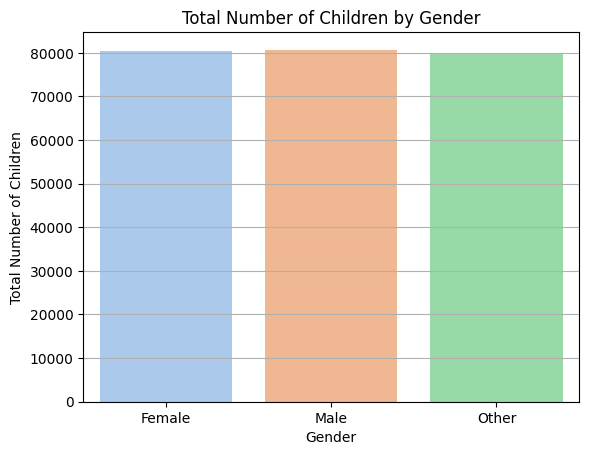

In [26]:

Total_children=cust_detail.groupby('Gender')['Number_of_children'].sum()
print(Total_children)


# Plotting
sns.barplot(data=Total_children, palette='pastel')
plt.title('Total Number of Children by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Number of Children')
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.grid(axis='y')  # Add grid lines for better readability
plt.show()


1.4 What is the proportion of income bracket of the customers based on age group?
<ul>
<li>Grouping age as -Teens (12-19), Young Adults (20-29), Adults (30-49), Middle-aged (50-64), Seniors (65+)
</ul>

In [27]:
# Age categorization
age_category=cust_detail['Age']
bins = [12,20,30,50,65,85]
labels = ['Teen', 'Young Adults', 'Adults', 'Middle-aged', 'Seniors']
cust_detail['Age_group'] = pd.cut(cust_detail['Age'], bins=bins, labels=labels,right=False)
print(cust_detail)


        Age  Gender Income_bracket Loyalty_program  Membership_years Churned  \
796074   45   Other         Medium             Yes                 4     Yes   
350735   78   Other         Medium              No                 2      No   
593611   30    Male         Medium             Yes                 9     Yes   
561840   32   Other           High             Yes                 5     Yes   
747277   19    Male            Low              No                 4      No   
...     ...     ...            ...             ...               ...     ...   
326422   76    Male         Medium              No                 2      No   
371513   30  Female            Low             Yes                 4      No   
445792   56   Other         Medium              No                 7     Yes   
198883   56    Male            Low              No                 2      No   
997196   31  Female            Low             Yes                 7     Yes   

        Number_of_children     Occupati

C:\Users\Admin\AppData\Local\Temp\ipykernel_15020\3674620565.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_detail['Age_group'] = pd.cut(cust_detail['Age'], bins=bins, labels=labels,right=False)


In [28]:
cust_detail.isnull().sum()

Age                   0
Gender                0
Income_bracket        0
Loyalty_program       0
Membership_years      0
Churned               0
Number_of_children    0
Occupation            0
Age_group             0
dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_15020\29068787.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_income = cust_detail.groupby(['Age_group', 'Income_bracket']).size().unstack(fill_value=0)


Income_bracket   High    Low  Medium
Age_group                           
Teen             1268   1318    1294
Young Adults     6399   6366    6468
Adults          12728  12918   13103
Middle-aged      9740   9809    9593
Seniors          9708   9614    9674


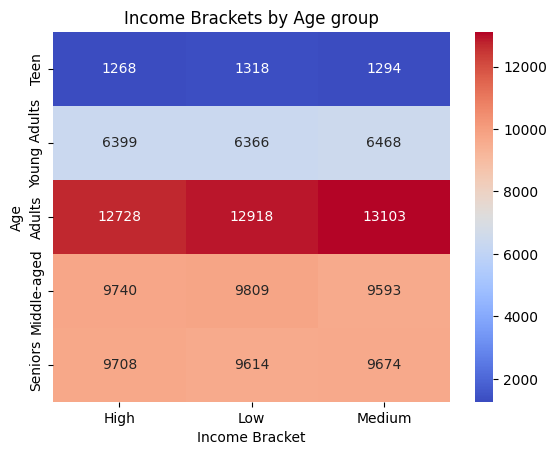

In [29]:
age_income = cust_detail.groupby(['Age_group', 'Income_bracket']).size().unstack(fill_value=0)
print(age_income)


# Plotting Heatmaps for income bracket based on Age groups
sns.heatmap(age_income, cmap='coolwarm', annot=True, fmt='d')
plt.title('Income Brackets by Age group')
plt.xlabel('Income Bracket')
plt.ylabel('Age')
plt.show()

1.5 Is there any relationship between income brackets, membership status and likelihood of churn?
<ul>
<li> Categorizing membership years as - Basic(0-2 years), Premium(3-10 years)
</ul> 

In [30]:
# Replacing No with 0 and Yes with 1
cust_detail['Churned']=cust_detail['Churned'].replace({'No':0,'Yes':1})
cust_detail

C:\Users\Admin\AppData\Local\Temp\ipykernel_15020\3718002924.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cust_detail['Churned']=cust_detail['Churned'].replace({'No':0,'Yes':1})
C:\Users\Admin\AppData\Local\Temp\ipykernel_15020\3718002924.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_detail['Churned']=cust_detail['Churned'].replace({'No':0,'Yes':1})


,Age,Gender,Income_bracket,Loyalty_program,Membership_years,Churned,Number_of_children,Occupation,Age_group
796074,45,Other,Medium,Yes,4,1,1,Employed,Adults
350735,78,Other,Medium,No,2,0,1,Retired,Seniors
593611,30,Male,Medium,Yes,9,1,4,Self-Employed,Adults
561840,32,Other,High,Yes,5,1,3,Retired,Adults
747277,19,Male,Low,No,4,0,1,Retired,Teen
...,...,...,...,...,...,...,...,...,...
326422,76,Male,Medium,No,2,0,3,Retired,Seniors
371513,30,Female,Low,Yes,4,0,4,Unemployed,Adults
445792,56,Other,Medium,No,7,1,0,Retired,Middle-aged
198883,56,Male,Low,No,2,0,3,Self-Employed,Middle-aged


In [31]:
print('Membership year range:',cust_detail['Membership_years'].min(),'-',cust_detail['Membership_years'].max())

# Grouping membership years
# Define the bins and labels
bins = [0, 3, 10]  
labels = ['Basic', 'Premium']

# Create a new column for categories
cust_detail['Membership_category'] = pd.cut(cust_detail['Membership_years'], bins=bins, labels=labels, right=False)
cust_detail

Membership year range: 0 - 9


C:\Users\Admin\AppData\Local\Temp\ipykernel_15020\856416305.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_detail['Membership_category'] = pd.cut(cust_detail['Membership_years'], bins=bins, labels=labels, right=False)


,Age,Gender,Income_bracket,Loyalty_program,Membership_years,Churned,Number_of_children,Occupation,Age_group,Membership_category
796074,45,Other,Medium,Yes,4,1,1,Employed,Adults,Premium
350735,78,Other,Medium,No,2,0,1,Retired,Seniors,Basic
593611,30,Male,Medium,Yes,9,1,4,Self-Employed,Adults,Premium
561840,32,Other,High,Yes,5,1,3,Retired,Adults,Premium
747277,19,Male,Low,No,4,0,1,Retired,Teen,Premium
...,...,...,...,...,...,...,...,...,...,...
326422,76,Male,Medium,No,2,0,3,Retired,Seniors,Basic
371513,30,Female,Low,Yes,4,0,4,Unemployed,Adults,Premium
445792,56,Other,Medium,No,7,1,0,Retired,Middle-aged,Premium
198883,56,Male,Low,No,2,0,3,Self-Employed,Middle-aged,Basic


In [32]:
cust_detail.isnull().sum()

Age                    0
Gender                 0
Income_bracket         0
Loyalty_program        0
Membership_years       0
Churned                0
Number_of_children     0
Occupation             0
Age_group              0
Membership_category    0
dtype: int64

In [33]:
# Group by income bracket and membership, calculate churn rate
churn_analysis = cust_detail.groupby(['Income_bracket', 'Membership_category']).agg(
    churn_count=('Churned', 'sum'),
    total_members=('Churned', 'count'),
    ).reset_index()

churn_analysis

C:\Users\Admin\AppData\Local\Temp\ipykernel_15020\4254584245.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_analysis = cust_detail.groupby(['Income_bracket', 'Membership_category']).agg(


,Income_bracket,Membership_category,churn_count,total_members
0,High,Basic,6025,12042
1,High,Premium,13912,27801
2,Low,Basic,6014,12125
3,Low,Premium,13987,27900
4,Medium,Basic,5924,11971
5,Medium,Premium,14144,28161


  Income_bracket Membership_category  churn_count  total_members  churn_rate
0           High               Basic         6025          12042    0.500332
1           High             Premium        13912          27801    0.500414
2            Low               Basic         6014          12125    0.496000
3            Low             Premium        13987          27900    0.501326
4         Medium               Basic         5924          11971    0.494863
5         Medium             Premium        14144          28161    0.502255


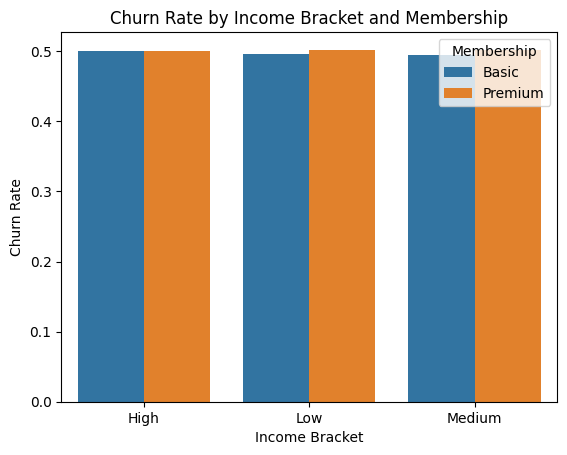

In [34]:
# Calculate churn rate
churn_analysis['churn_rate'] = churn_analysis['churn_count'] / churn_analysis['total_members']
print(churn_analysis)


# Plotting churn rates
sns.barplot(data=churn_analysis, x='Income_bracket', y='churn_rate', hue='Membership_category')
plt.title('Churn Rate by Income Bracket and Membership')
plt.ylabel('Churn Rate')
plt.xlabel('Income Bracket')
plt.legend(title='Membership')
plt.show()

<ul>
<li>The churn rates are fairly similar across different income brackets and membership categories, with values around 49% to 50%.</li>
</ul>
<ul>
<li>The Basic membership tends to have slightly higher churn rates compared to Premium memberships within the same income bracket.
Overall, Basic memberships consistently have higher churn counts compared to Premium memberships within each income bracket.
</ul>
<ul>
<li>High Income : Members have the highest churn counts in both Basic and Premium categories, indicating potential dissatisfaction or a need for more value.
<li>Medium Income : Similar churn rates for both membership types suggest a stable customer base.
<li>Low Income: While churn rates are also close, the churn counts for Premium members are significant, suggesting that cost might be a factor.</li>
</ul>
<ul>
<li>Basic Membership : Higher churn rates across all income brackets suggest that Basic members may not be finding enough value in their subscriptions.
<li>Premium Membership : Slightly lower churn rates indicate better retention, possibly due to perceived higher value or benefits.</li>
</ul>
<ul>
<li>Average churn rate across all categories is approximately 49.5%. This indicates that roughly half of the members across all segments are not renewing their memberships.</li>
</ul>
<ul>



1.6 How loyalty program enrollment correlates with churn and membership years?

In [35]:
# Group the data by Loyalty_program and calculate the churn rates
loyalty_churn = cust_detail.groupby('Loyalty_program')['Churned'].mean()
print('Churn based on',loyalty_churn)

# Calculate the average membership years for each loyalty program group
avg_membership_years = cust_detail.groupby('Loyalty_program')['Membership_years'].mean()
print('Average membership year based on',avg_membership_years)

Churn based on Loyalty_program
No     0.5011
Yes    0.4990
Name: Churned, dtype: float64
Average membership year based on Loyalty_program
No     4.500617
Yes    4.492268
Name: Membership_years, dtype: float64


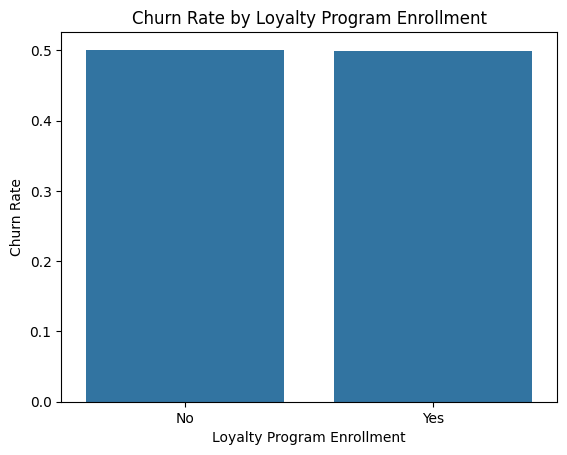

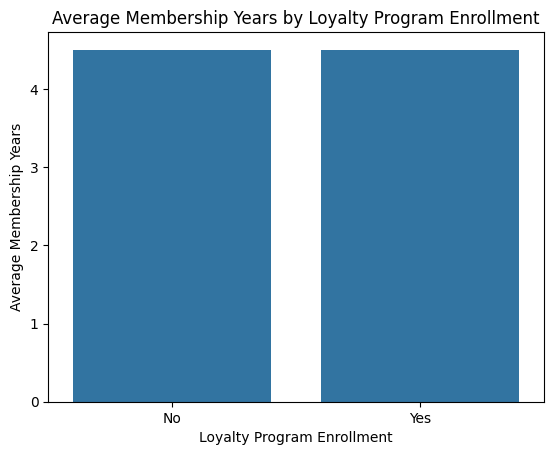

In [36]:
# Churn Rate Plot
sns.barplot(x=loyalty_churn.index, y=loyalty_churn.values)
plt.title('Churn Rate by Loyalty Program Enrollment')
plt.xlabel('Loyalty Program Enrollment')
plt.ylabel('Churn Rate')
plt.show()

# Average Membership Years Plot
sns.barplot(x=avg_membership_years.index, y=avg_membership_years.values)
plt.title('Average Membership Years by Loyalty Program Enrollment')
plt.xlabel('Loyalty Program Enrollment')
plt.ylabel('Average Membership Years')
plt.show()


In [37]:
# Convert 'Loyalty_program' to numerical (1 for Yes, 0 for No)
cust_detail['Loyalty_program'] = cust_detail['Loyalty_program'].map({'Yes': 1, 'No': 0})

# Calculate the correlation matrix
correlation_matrix = cust_detail[['Membership_years', 'Churned', 'Loyalty_program']].corr()
print(correlation_matrix)

                  Membership_years   Churned  Loyalty_program
Membership_years          1.000000  0.000669        -0.001451
Churned                   0.000669  1.000000        -0.002100
Loyalty_program          -0.001451 -0.002100         1.000000


C:\Users\Admin\AppData\Local\Temp\ipykernel_15020\2670452283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_detail['Loyalty_program'] = cust_detail['Loyalty_program'].map({'Yes': 1, 'No': 0})


<ul>
<i>The lack of significant correlations suggests that:</i>
<li>Membership duration does not influence churn : Customers tend to churn regardless of how long they have been members.</li>
<li>Loyalty program participation has minimal impact on churn rates : Being part of the loyalty program does not strongly correlate with whether a member stays or leaves.</li>
</ul>

2. Transactional Details of Customers

In [38]:
trans_details=df[['Product_category','Total_sales','Avg_purchase_value','Total_transactions','Purchase_frequency','Days','Weeks','Months']]
trans_details.sort_values(by='Product_category').reset_index().drop(columns='index')

,Product_category,Total_sales,Avg_purchase_value,Total_transactions,Purchase_frequency,Days,Weeks,Months
0,Clothing,5137.55,484.92,55,Monthly,Friday,52,3
1,Clothing,3420.50,98.79,81,Monthly,Saturday,26,1
2,Clothing,3364.60,111.08,93,Weekly,Tuesday,52,8
3,Clothing,9412.42,259.42,31,Weekly,Saturday,31,1
4,Clothing,4222.89,395.94,84,Weekly,Friday,44,5
...,...,...,...,...,...,...,...,...
119995,Toys,205.87,472.13,74,Monthly,Tuesday,33,8
119996,Toys,7499.01,123.62,34,Yearly,Wednesday,48,1
119997,Toys,263.06,430.59,94,Weekly,Saturday,30,4
119998,Toys,7009.87,131.52,14,Yearly,Sunday,16,11


2.1 Which are the frequently purchased products based on product categories?

In [39]:
product_frequency = trans_details.groupby('Product_category').agg(
    Purchase_count=('Product_category', 'count'),
    Total_Sales=('Total_sales', 'sum')
).reset_index()

product_frequency = product_frequency.sort_values(by='Purchase_count',ascending=False).reset_index().drop(columns='index')
product_frequency


,Product_category,Purchase_count,Total_Sales
0,Electronics,24315,1.232135e+08
1,Toys,24094,1.214983e+08
2,Clothing,23999,1.220112e+08
3,Groceries,23865,1.200785e+08
4,Furniture,23727,1.202560e+08


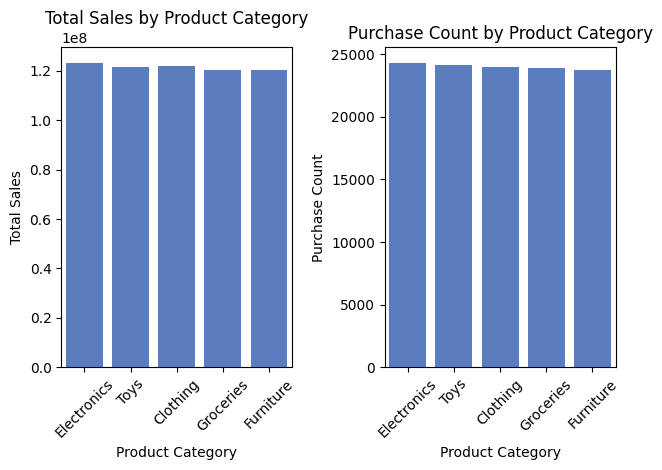

In [40]:
 # Set the custom color palette
sns.set_palette('muted')

# Bar chart for Total Sales
plt.subplot(1, 2, 1)
sns.barplot(data=product_frequency,x='Product_category', y='Total_Sales')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

# Bar chart for Purchase Count
plt.subplot(1, 2, 2)
sns.barplot(data=product_frequency, x='Product_category', y='Purchase_count')
plt.title('Purchase Count by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Purchase Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


2.2 What is the Average Total Sales per Product category?

  Product_category  Avg_Sales_Per_Purchase
0      Electronics             5067.388159
1             Toys             5042.679475
2         Clothing             5084.013253
3        Groceries             5031.572089
4        Furniture             5068.320552


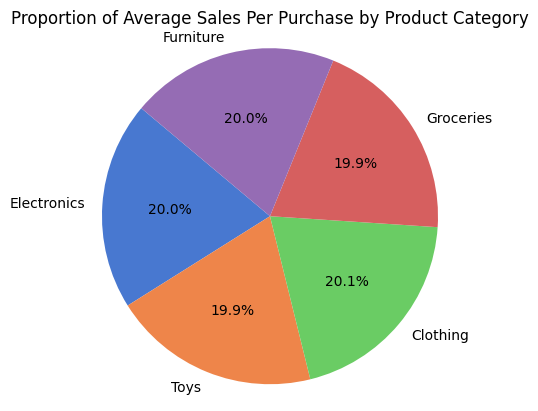

In [41]:
# Calculate the average sales per purchase
product_frequency['Avg_Sales_Per_Purchase'] = product_frequency['Total_Sales'] / product_frequency['Purchase_count']
print(product_frequency[['Product_category', 'Avg_Sales_Per_Purchase']])


plt.pie(product_frequency['Avg_Sales_Per_Purchase'], labels=product_frequency['Product_category'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Average Sales Per Purchase by Product Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

3. Sale Trends

In [42]:
#weekly_trends Weekly sale trends
weekly_trends=trans_details.groupby('Weeks').agg(
    weekly_count=('Weeks', 'count'),
    Total_Sales=('Total_sales', 'sum')).reset_index()

print(weekly_trends.head(10))

# Monthly sale trends
monthly_trends=trans_details.groupby('Months').agg(
    monthly_count=('Months', 'count'),
    Total_Sales=('Total_sales', 'sum')).reset_index()

print(monthly_trends)


   Weeks  weekly_count  Total_Sales
0      1          2298  11674659.50
1      2          2256  11469817.95
2      3          2339  11990579.70
3      4          2265  11375345.51
4      5          2317  11584447.76
5      6          2234  11325367.71
6      7          2245  11194022.59
7      8          2328  11716017.46
8      9          2342  11826862.01
9     10          2310  11921295.49
    Months  monthly_count  Total_Sales
0        1          10131  50995995.66
1        2          10010  50486393.48
2        3           9986  50469410.42
3        4           9924  50115677.02
4        5           9896  50516046.42
5        6           9890  49950971.09
6        7          10061  51078030.05
7        8          10060  50803742.98
8        9          10072  51389450.19
9       10           9805  49284809.99
10      11          10245  52181977.59
11      12           9920  49785101.14


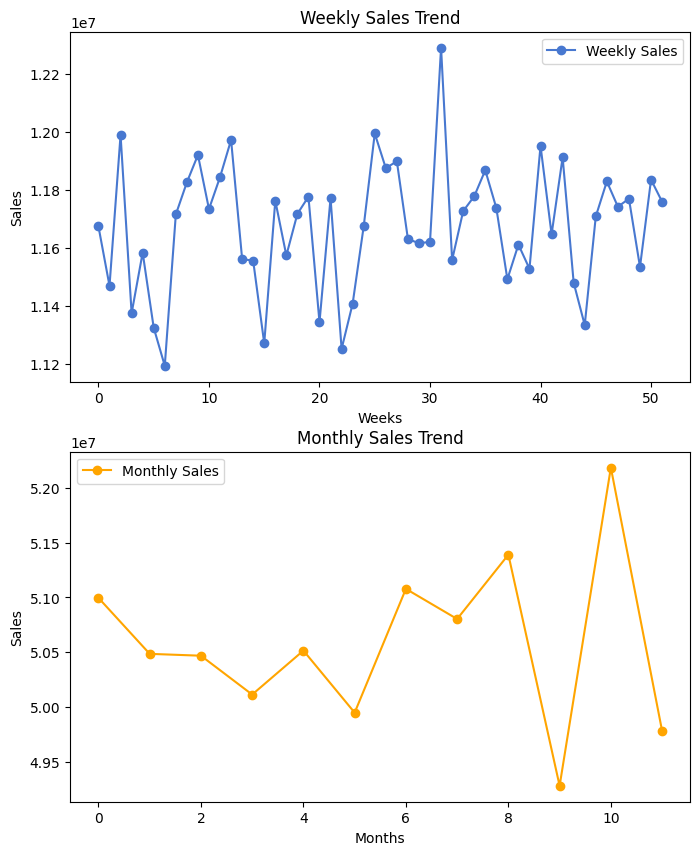

In [43]:
plt.figure(figsize=(8, 10))

# Weekly Trend
plt.subplot(2, 1,1)
plt.plot(weekly_trends.index, weekly_trends['Total_Sales'], marker='o', label='Weekly Sales')
plt.title('Weekly Sales Trend')
plt.xlabel('Weeks')
plt.ylabel('Sales')
plt.legend()

# Monthly Trend
plt.subplot(2, 1, 2)
plt.plot(monthly_trends.index, monthly_trends['Total_Sales'], marker='o', color='orange', label='Monthly Sales')
plt.title('Monthly Sales Trend')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.legend()

In [44]:
weekly_trends.describe()

,Weeks,weekly_count,Total_Sales
count,52.000000,52.000000,5.200000e+01
mean,26.500000,2307.692308,1.167418e+07
std,15.154757,44.320375,2.204145e+05
min,1.000000,2212.000000,1.119402e+07
25%,13.750000,2282.750000,1.155100e+07
50%,26.500000,2306.500000,1.171267e+07
75%,39.250000,2332.000000,1.182764e+07
max,52.000000,2436.000000,1.229154e+07


1. What mode of purchase is generally preferred by Customers based on Gender and Product category?

In [46]:
#  Extracting the necessary columns
df1=df[['Gender','Product_category','In_store_purchases','Online_purchases']].reset_index().drop(columns='index')
print(df1.head().to_string())

  Gender Product_category  In_store_purchases  Online_purchases
0  Other         Clothing                  80                97
1  Other             Toys                  43                11
2   Male      Electronics                  12                19
3  Other         Clothing                  41                45
4   Male         Clothing                   3                 2


In [47]:
# Adding columns for total online purchases and total in-store purchases done based on gender and product category
df2=df1.groupby(['Gender','Product_category'],as_index=False).agg(Total_online_purchases=('Online_purchases','sum'),Total_in_store_purchases=('In_store_purchases','sum'))
df2

,Gender,Product_category,Total_online_purchases,Total_in_store_purchases
0,Female,Clothing,389475,393376
1,Female,Electronics,402683,400309
2,Female,Furniture,390980,396913
3,Female,Groceries,393209,396955
4,Female,Toys,408094,405625
5,Male,Clothing,396924,396851
6,Male,Electronics,395012,401665
7,Male,Furniture,397811,396915
8,Male,Groceries,394781,390294
9,Male,Toys,390624,388880


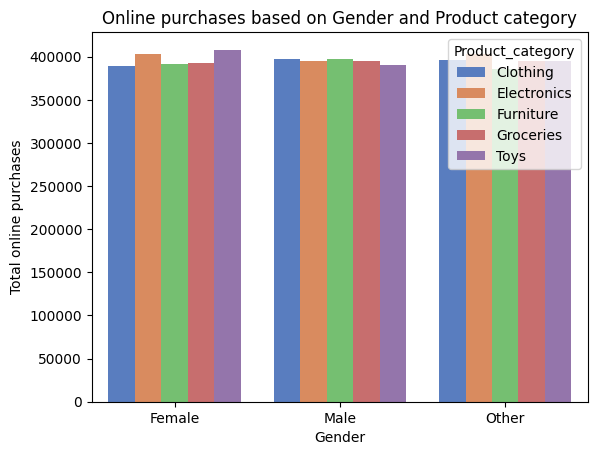

In [48]:
# Plot bar graph showing the preferred mode of purchase based on Gender and Product category
sns.barplot(data=df2,x='Gender',y='Total_online_purchases',hue='Product_category')
plt.title('Online purchases based on Gender and Product category')
plt.xlabel('Gender')
plt.ylabel('Total online purchases')
plt.show()

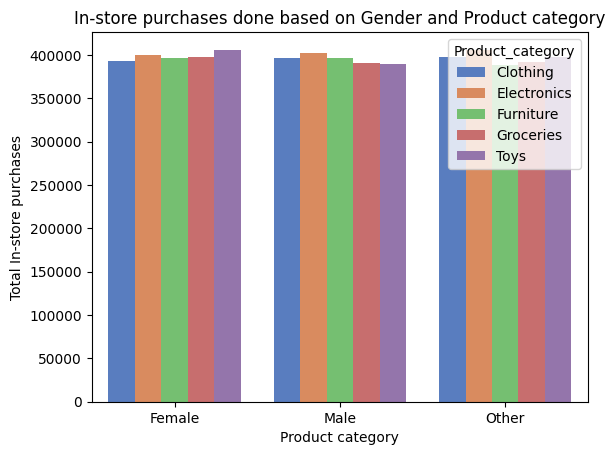

In [49]:
sns.barplot(data=df2,x='Gender',y='Total_in_store_purchases',hue='Product_category')
plt.title('In-store purchases done based on Gender and Product category')
plt.xlabel('Product category')
plt.ylabel('Total In-store purchases')
plt.show()

In [50]:
# Calculating total online and in-store purchases based on gender
df3=df2.groupby(['Gender'],as_index=False).agg(Online=('Total_online_purchases','sum'),In_store=('Total_in_store_purchases','sum'))
df3


,Gender,Online,In_store
0,Female,1984441,1993178
1,Male,1975152,1974605
2,Other,1975457,1981182


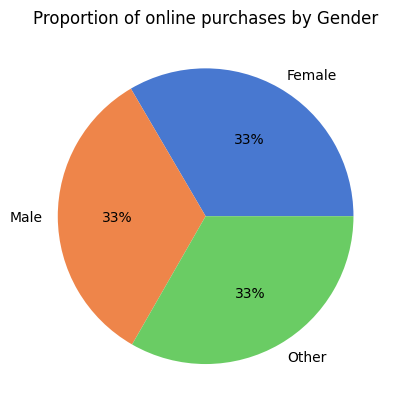

In [51]:
# Plots pie graph for representing the proportion of the modes of purchase preferred
pie_color=sns.color_palette('muted')
plt.pie(df3['Online'],labels=df3['Gender'],colors=pie_color,autopct='%.0f%%')
plt.title("Proportion of online purchases by Gender")
plt.show()

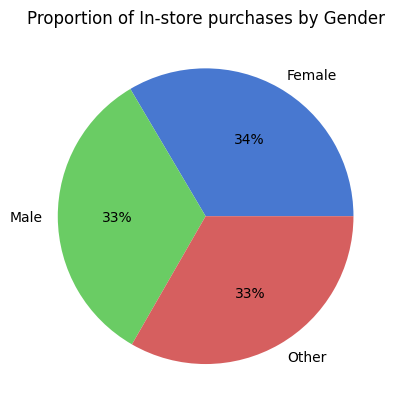

In [52]:
pie_color1=sns.color_palette('muted6')
plt.pie(df3['In_store'],labels=df3['Gender'],colors=pie_color1,autopct='%.0f%%')
plt.title('Proportion of In-store purchases by Gender')
plt.show()

2. Which store has the maximum sales?

In [53]:
df5=df.groupby(['Preferred_store'],as_index=False).agg(Sales=('Total_sales','sum'))
df5.sort_values(by='Sales',ascending=False).reset_index().drop(columns='index')

,Preferred_store,Sales
0,Location B,1.529646e+08
1,Location A,1.525919e+08
2,Location D,1.508867e+08
3,Location C,1.506144e+08


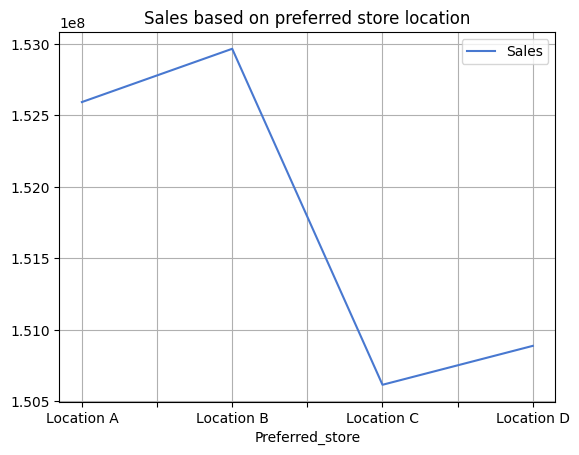

In [54]:
df5.plot(kind='line',x='Preferred_store',y='Sales',title='Sales based on preferred store location')
plt.grid(True)

3. Which Product has been returned the most?

In [55]:
df4=df.groupby(['Product_category'],as_index=False).agg(Total_returns=("Product_return_rate",'sum')).sort_values(by='Total_returns',ascending=False).reset_index().drop(columns='index')
df4



,Product_category,Total_returns
0,Electronics,6100.09
1,Clothing,6035.52
2,Toys,6030.71
3,Groceries,5954.55
4,Furniture,5946.23
